In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [3]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2)
        self.conv6 = nn.Conv2d(64, 192, kernel_size=3, padding=3 // 2)
        self.UPSCALE = nn.Upsample(scale_factor=2, mode='nearest')
        self.conv7 = nn.Conv2d(192, 1,kernel_size=3, padding=3 // 2)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        C1 = self.conv1(x)
        A1 = self.relu(C1)
        C2 = self.conv2(A1)
        A2 = self.relu(C2)
        C3 = self.conv3(A2)
        A3 = self.relu(C3)
        C4 = self.conv4(A3)
        A4 = self.relu(C4)
        #Sum1 = torch.cat(C2,C4)
        C5 = self.conv5(A4)
        A5 = self.relu(C5)
        C6 = self.conv6(A5)
        A6 = self.relu(C6)
        U = self.UPSCALE(A6)
        C7 = self.conv7(U)
        A7 = self.relu(C7)
        out = torch.cat((A1,A3,A5),1)
        out1 = self.conv7(out)
        return out1
model = SRCNN()
print(model)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (UPSCALE): Upsample(scale_factor=2.0, mode=nearest)
  (conv7): Conv2d(192, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
)


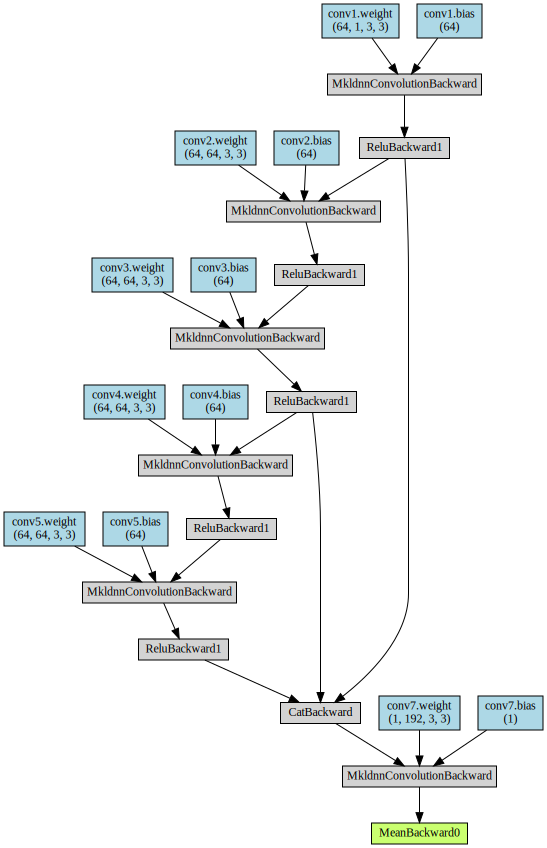

In [4]:
x = Variable(torch.randn(1,1,3,3))
y = model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))

In [ ]:
!python train.py --train-file "trainingdataset/91-image_x4.h5" --eval-file "eval/Set5_x4.h5"  --outputs-dir "wazir/" --scale 4 --lr 1e-4 --batch-size 16 --num-epochs 5 --num-workers 8 --seed 123    

In [ ]:
python test.py --weights-file "wazir/x4/epoch_4.pth" --image-file "data/baby.png"